In [ ]:
a=10
b=20
c=a+b
c

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
bank_df=pd.read_csv(r"C:\Users\purus\OneDrive\Desktop\Naresh IT\Data files\bank.csv", delimiter=';')
cat=bank_df.select_dtypes(include='object').columns
num=bank_df.select_dtypes(exclude='object').columns

In [3]:
len(cat)

10

In [4]:
bank_df.shape

(4521, 17)

In [5]:
bank_df.size

76857

In [6]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
# Analysis for missing values
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Categorical Col Analysis**

In [11]:
#Cat Column
cwd=os.getcwd()

for i in cat:
    vc=bank_df[f'{i}'].value_counts()
    keys=vc.keys()
    values=vc.values
    df=pd.DataFrame(zip(keys,values),columns=[f'{i}','counts'])
    file_name=f'{i}_df.csv'
    path=os.path.join(cwd,file_name)
    df.to_csv(path,index=False)

[WinError 183] Cannot create a file when that file already exists: 'Bar Charts'


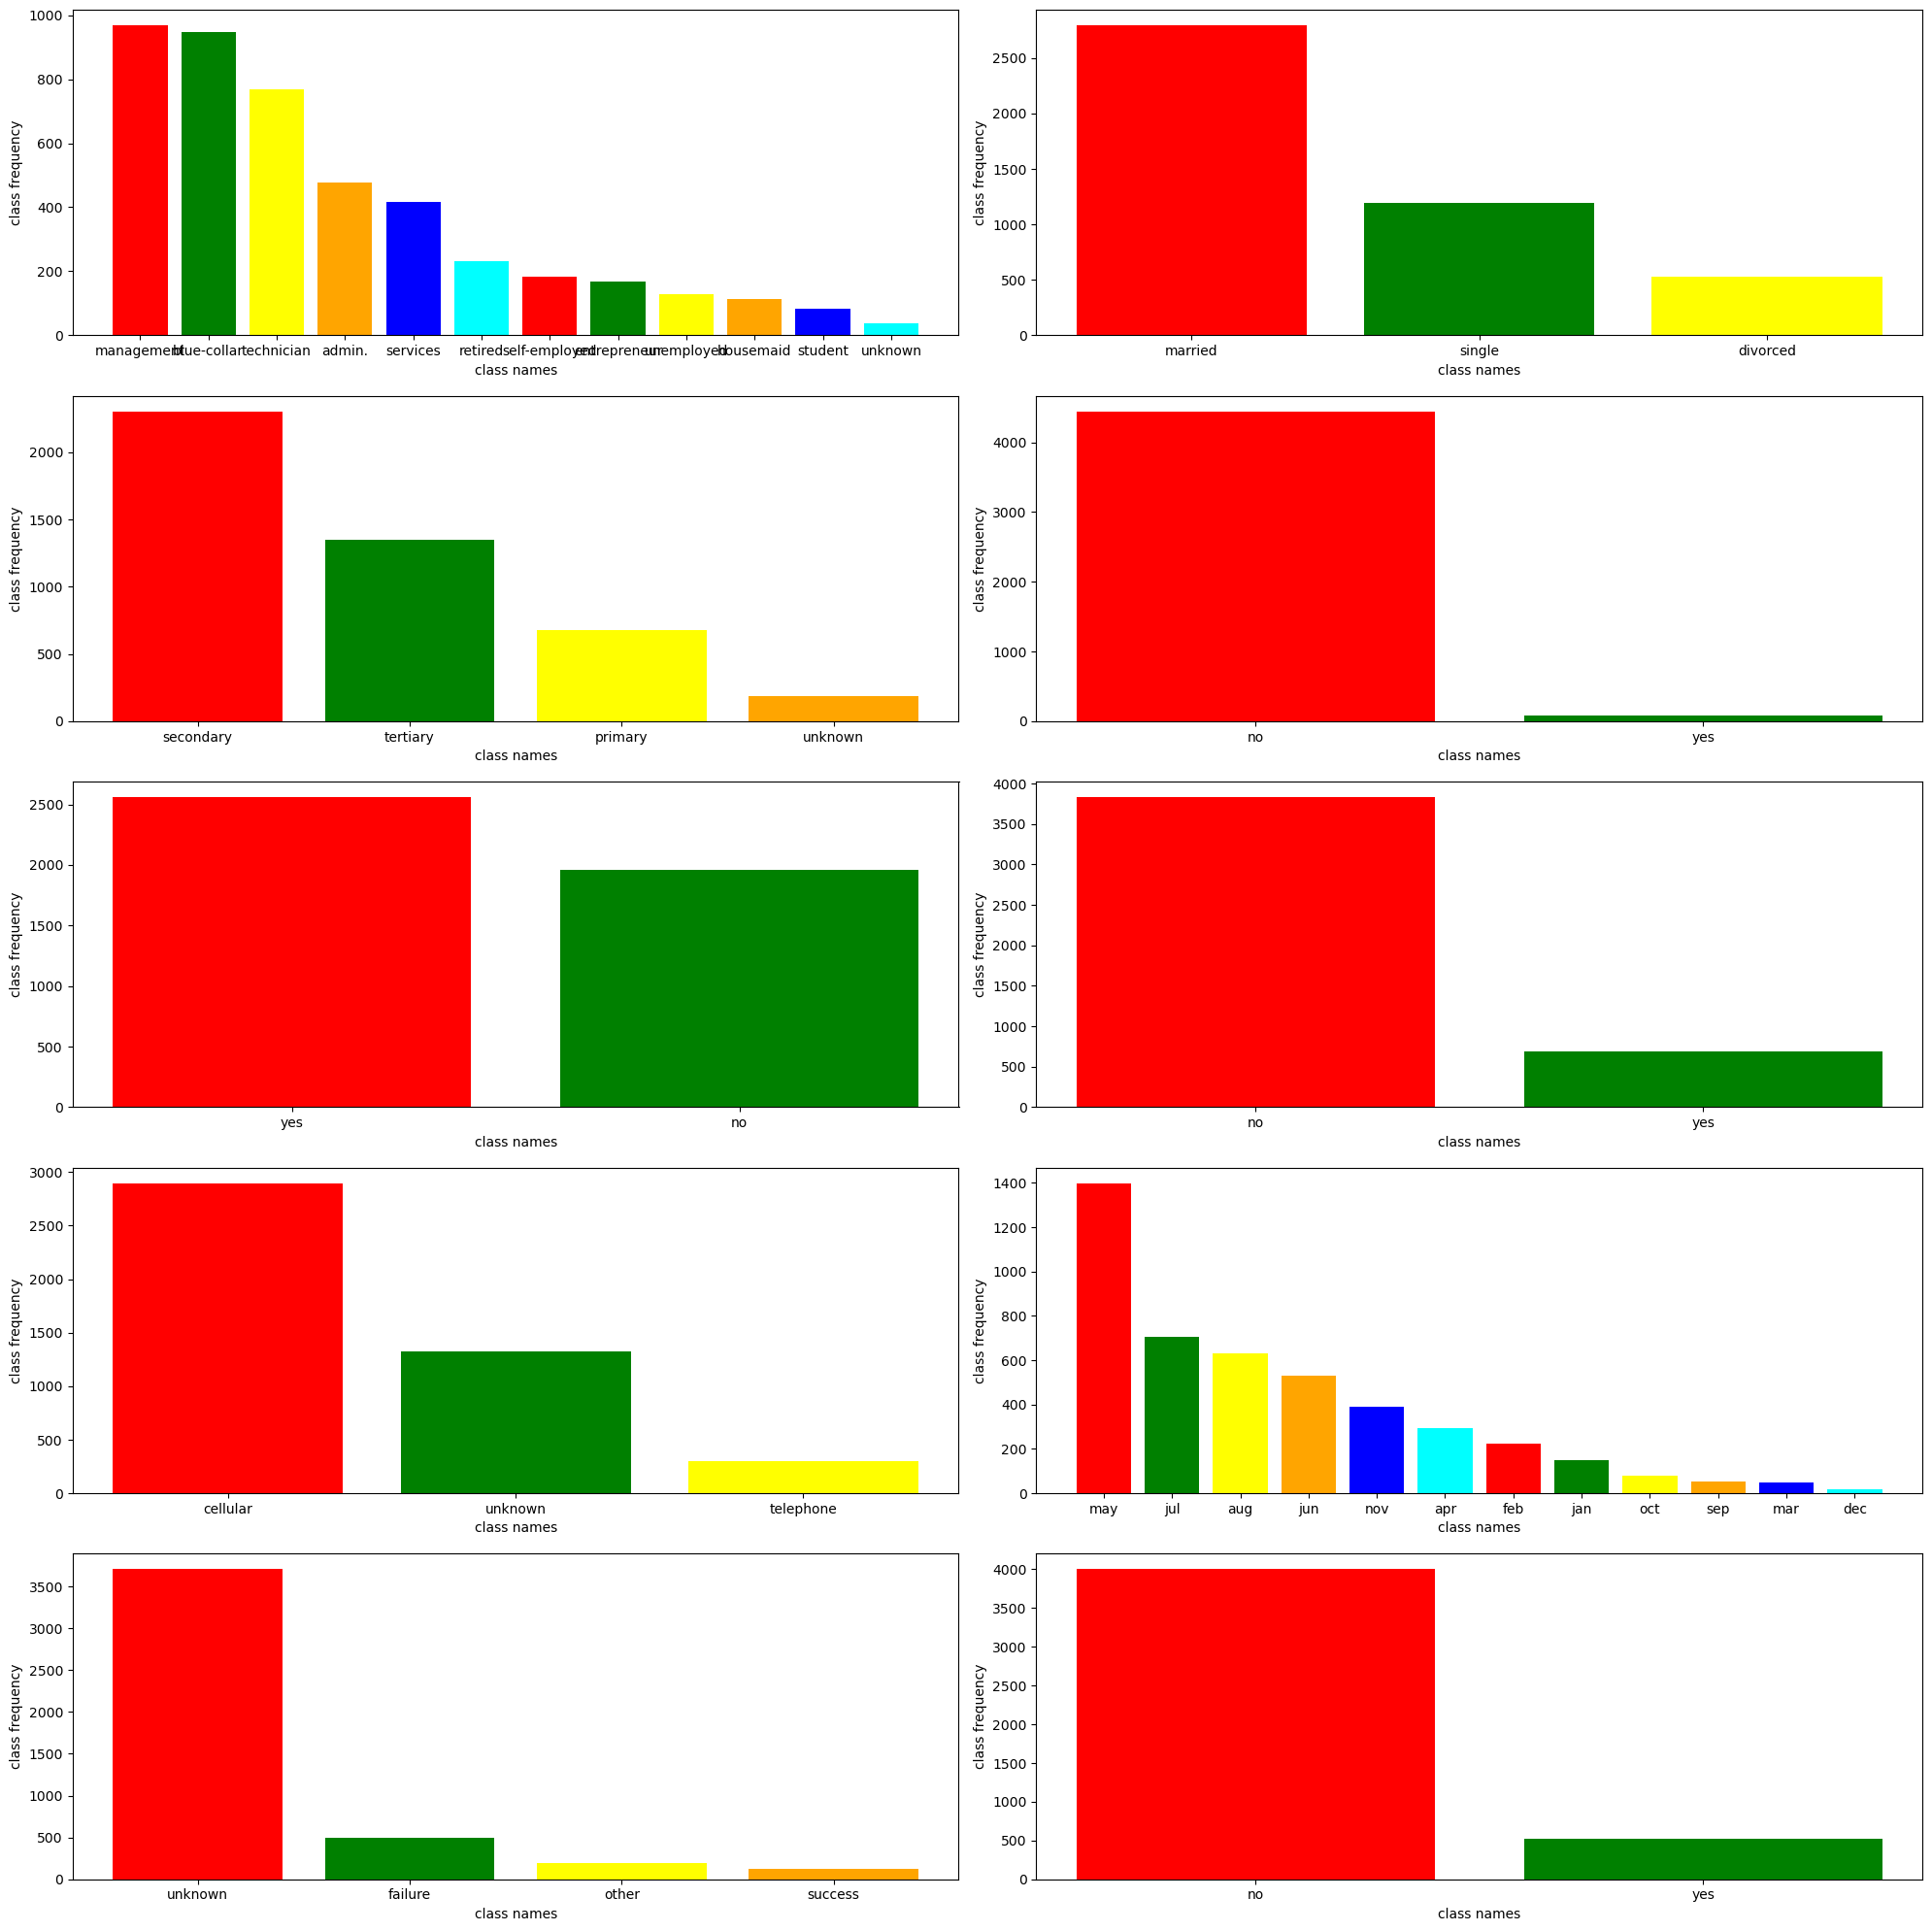

In [12]:
colors=['Red','Green','Yellow','Orange','Blue','Cyan']
try:
    folder_name='Bar Charts'
    os.makedirs(folder_name)
    cwd=os.getcwd()
    nwd=os.path.join(cwd,folder_name)
except Exception as e:
    nwd=os.path.join(cwd,folder_name)
    print(e)
plt.figure(figsize=(20,20))
for i,j in zip(cat,range(1,len(cat)+1)):
    vc=bank_df[f'{i}'].value_counts()
    keys=vc.keys()
    values=vc.values
    plt.subplot(5,2,j)
    plt.bar(keys,values,color=colors)
    plt.xlabel('class names')
    plt.ylabel('class frequency')
chart_name=f'all_BarChart.jpg'
path=os.path.join(nwd,chart_name)
plt.tight_layout()
plt.savefig(path)

[WinError 183] Cannot create a file when that file already exists: 'pie Charts'


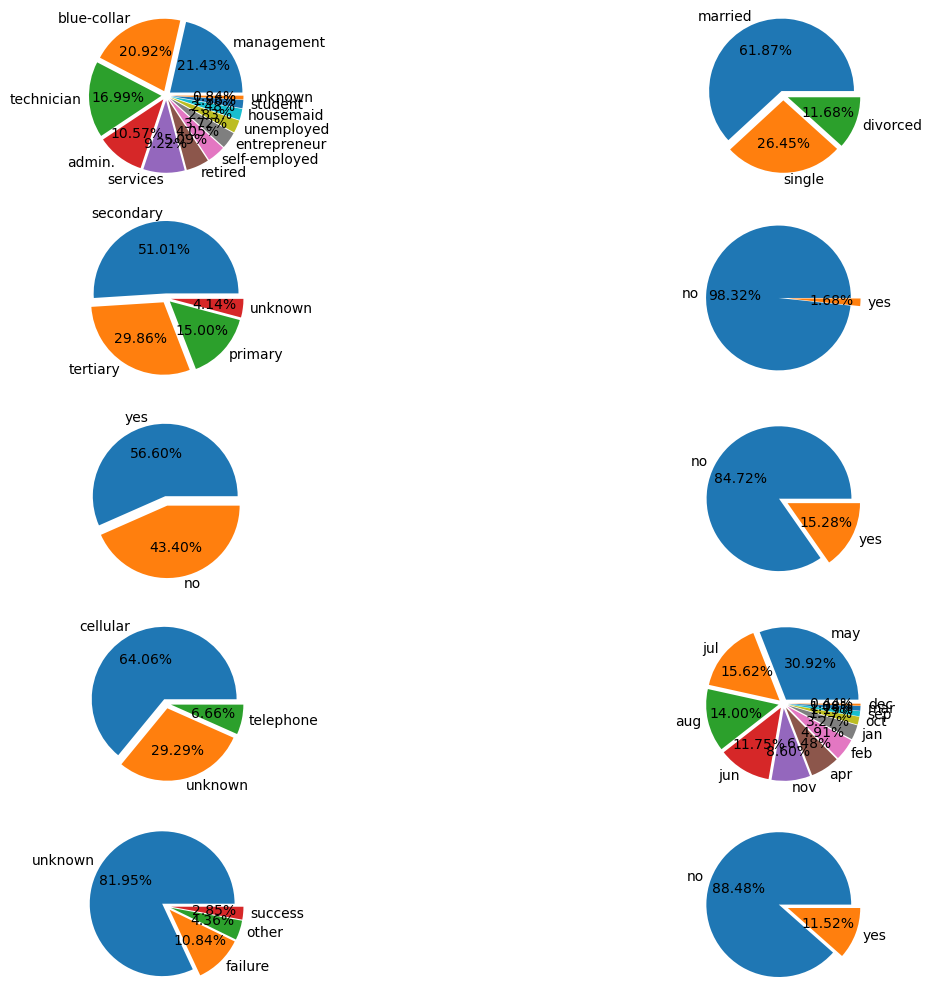

In [13]:
colors=['Red','Green','Yellow','Orange','Blue','Cyan']
try:
    folder_name='pie Charts'
    os.makedirs(folder_name)
    cwd=os.getcwd()
    nwd=os.path.join(cwd,folder_name)
except Exception as e:
    nwd=os.path.join(cwd,folder_name)
    print(e)
plt.figure(figsize=(15,10))
for i,j in zip(cat,range(1,len(cat)+1)):
    vc=bank_df[f'{i}'].value_counts(normalize=True)
    keys=vc.keys()
    values=vc.values
    plt.subplot(5,2,j)
    plt.pie(values,labels=keys,autopct='%0.2f%%',radius=1.5,explode=[0.1 for i in range(1,len(keys)+1)])
    #fig_name=f'{i}_pieChart.jpg'
    #path=os.path.join(nwd,fig_name)
    #plt.savefig(path)
plt.tight_layout()
plt.show()

**Numerical Analysis**

In [15]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
len(num)

7

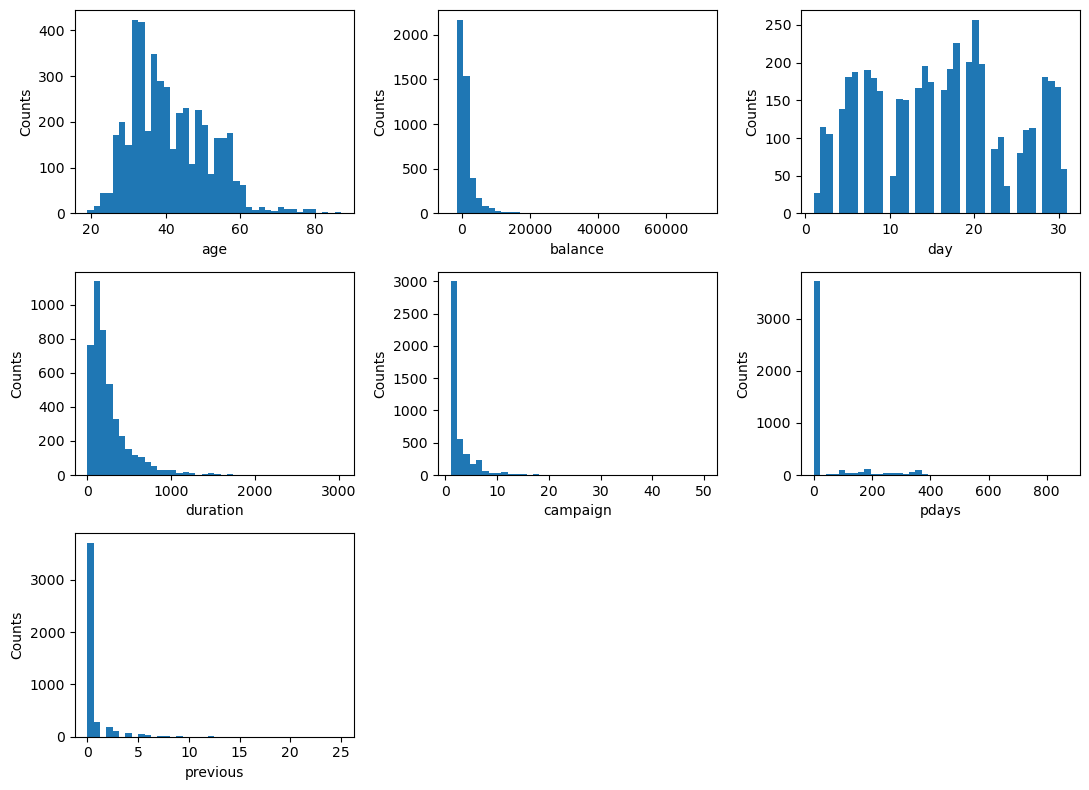

In [17]:
plt.figure(figsize=(11,8))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(3,3,j)
    plt.hist(bank_df[i],bins=40)
    plt.xlabel(f'{i}')
    plt.ylabel('Counts')
plt.tight_layout()
plt.show()

**Outliers Analysis**

In [19]:
bal_data=bank_df['balance']
q1=np.percentile(bal_data,25)
q2=np.percentile(bal_data,50)
q3=np.percentile(bal_data,75)
iqr=q3-q1
con1=bal_data<(q1-1.5*iqr)
con2=bal_data>(q3+1.5*iqr)
cond=con1 | con2
outliers_data=bal_data[cond]
outliers_data=outliers_data.values
len(outliers_data)

506

In [20]:
bal_data=bank_df['balance']
q1=np.percentile(bal_data,25)
q2=np.percentile(bal_data,50)
q3=np.percentile(bal_data,75)
iqr=q3-q1
con1=bal_data>(q1-1.5*iqr)
con2=bal_data<(q3+1.5*iqr)
cond=con1 & con2
non_outliers_data=bal_data[cond]

len(non_outliers_data)

4015

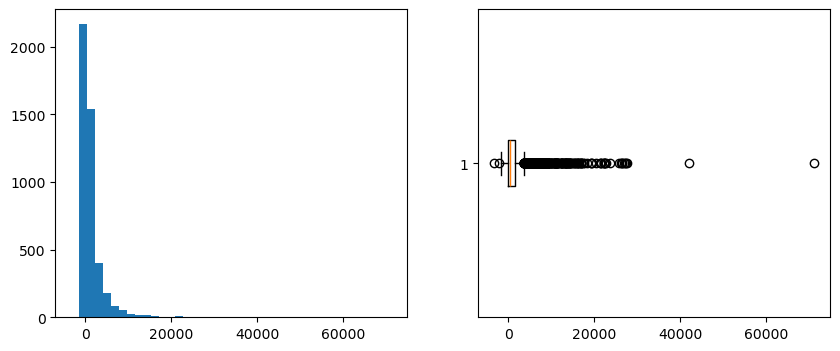

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1).hist(bal_data,bins=40)
plt.subplot(1,2,2).boxplot(bal_data,vert=False)
plt.show()

In [22]:
list1=[]
med=bal_data.median()
for i in bal_data:
    if i in outliers_data:
        list1.append(med)
    else:
        list1.append(i)

bank_df['balance']=list1

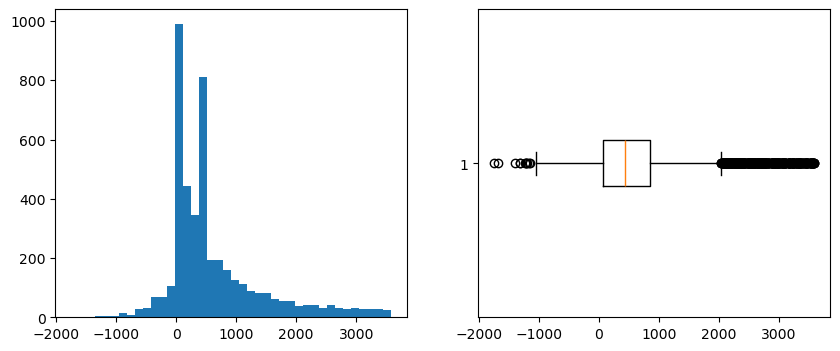

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1).hist(bank_df['balance'],bins=40)
plt.subplot(1,2,2).boxplot(bank_df['balance'],vert=False)
plt.show()

In [62]:
col1=bank_df['age']
col2=bank_df['balance']
col3=bank_df['duration']
col=[col2,col3]
analysis1=pd.crosstab(col1,col)

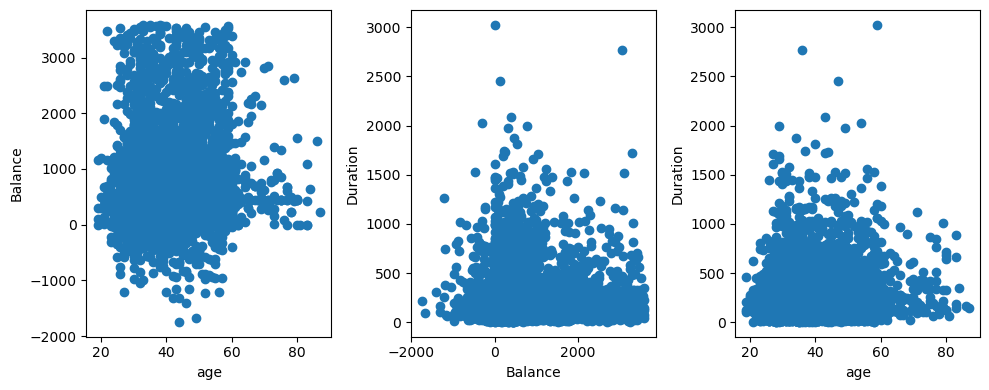

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('age')
plt.ylabel('Balance')

plt.subplot(1,3,2).scatter(col2,col3)
plt.xlabel('Balance')
plt.ylabel('Duration')

plt.subplot(1,3,3).scatter(col1,col3)
plt.xlabel('age')
plt.ylabel('Duration')

plt.tight_layout()
plt.show()

<Axes: >

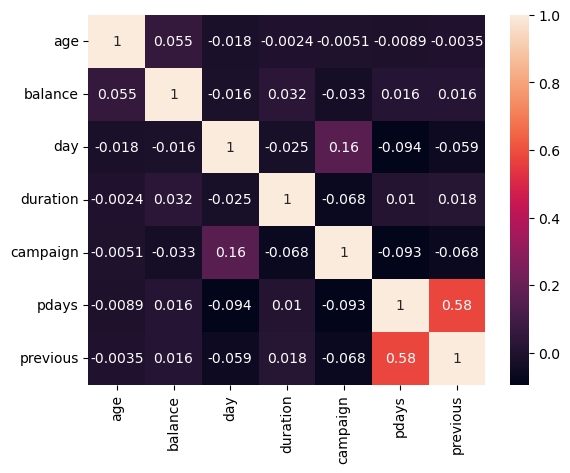

In [26]:
corr=bank_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

**Lable Encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in cat[1:]:
    bank_df[f'{i}'] = le.fit_transform(bank_df[f'{i}'])

In [58]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787.0,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,444.0,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350.0,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476.0,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0.0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333.0,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,444.0,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295.0,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137.0,0,0,0,6,3,129,4,211,3,1,0


In [60]:
pd.get_dummies(bank_df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787.0,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,444.0,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350.0,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476.0,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0.0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333.0,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,444.0,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295.0,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137.0,0,0,0,6,3,129,4,211,3,1,0


In [68]:
training_data=bank_df.drop(columns=['day','duration'])

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score